#### Import all the necessary libraries

In [1]:
# Import all required libraries
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np
from numpy.random import uniform

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random Sampling
from random import sample

# Utility function
from math import isnan

# Scaling the data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Calculate the ideal number of clusters
from sklearn.metrics import silhouette_score

# KMeans Algorithm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

# Hierarchial Clustering Algorithm
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Determine the number of clusters
from sklearn.metrics import silhouette_score

#### Import the Data Set

In [2]:
# Load the Data Set
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.200,10.000,7.580,44.900,1610,9.440,56.200,5.820,553
1,Albania,16.600,28.000,6.550,48.600,9930,4.490,76.300,1.650,4090
2,Algeria,27.300,38.400,4.170,31.400,12900,16.100,76.500,2.890,4460
3,Angola,119.000,62.300,2.850,42.900,5900,22.400,60.100,6.160,3530
4,Antigua and Barbuda,10.300,45.500,6.030,58.900,19100,1.440,76.800,2.130,12200


#### Analyse the Data set

In [3]:
# Every record corresponds to a single country.
data['country'].value_counts()

Japan              1
Spain              1
Madagascar         1
Kyrgyz Republic    1
Pakistan           1
                  ..
Chile              1
Netherlands        1
Belarus            1
Kenya              1
Cameroon           1
Name: country, Length: 167, dtype: int64

In [4]:
# Get information about all the data field types - metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Get general data aggregated information 
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000,167.000
mean,38.270,41.109,6.816,46.890,17144.689,7.782,70.556,2.948,12964.156
std,40.329,27.412,2.747,24.210,19278.068,10.571,8.893,1.514,18328.705
min,2.600,0.109,1.810,0.066,609.000,-4.210,32.100,1.150,231.000
25%,8.250,23.800,4.920,30.200,3355.000,1.810,65.300,1.795,1330.000
50%,19.300,35.000,6.320,43.300,9960.000,5.390,73.100,2.410,4660.000
75%,62.100,51.350,8.600,58.750,22800.000,10.750,76.800,3.880,14050.000
max,208.000,200.000,17.900,174.000,125000.000,104.000,82.800,7.490,105000.000


In [6]:
# Check for any null values in data.
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Augment the data with an id column
data['id'] = data.index + 1

#### Data Cleaning and Preprocessing

In [8]:
# Function to convert percentage values to absolute numeric values.
def change_value_format(df, column):
    df[column] = (df[column] / 100) * df['gdpp']
    return df

In [9]:
data = change_value_format(data, 'imports')
data = change_value_format(data, 'exports')
data = change_value_format(data, 'health')

In [10]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,id
0,Afghanistan,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553,1
1,Albania,16.600,1145.200,267.895,1987.740,9930,4.490,76.300,1.650,4090,2
2,Algeria,27.300,1712.640,185.982,1400.440,12900,16.100,76.500,2.890,4460,3
3,Angola,119.000,2199.190,100.605,1514.370,5900,22.400,60.100,6.160,3530,4
4,Antigua and Barbuda,10.300,5551.000,735.660,7185.800,19100,1.440,76.800,2.130,12200,5


#### Get the numeric columns of the data frame for clustering.

In [11]:
data_params = data[['id', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
data_params.head()

,id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,90.200,55.300,41.917,248.297,1610,9.440,56.200,5.820,553
1,2,16.600,1145.200,267.895,1987.740,9930,4.490,76.300,1.650,4090
2,3,27.300,1712.640,185.982,1400.440,12900,16.100,76.500,2.890,4460
3,4,119.000,2199.190,100.605,1514.370,5900,22.400,60.100,6.160,3530
4,5,10.300,5551.000,735.660,7185.800,19100,1.440,76.800,2.130,12200


#### Plot all the columns and observe the outliers in each column

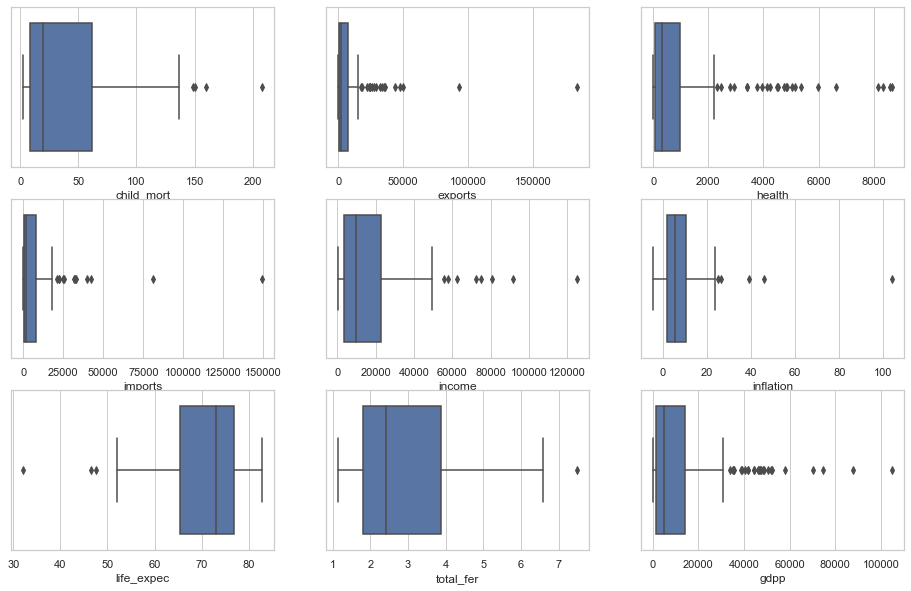

In [12]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = data_params.columns.tolist()[1:]

for i in enumerate(columns):
    plt.subplot(3, 3, i[0] + 1)
    sns.boxplot(x = i[1], data = data_params)

#### Declare re-usable methods for outlier treatment 

In [13]:
# Remove outliers using cut off lower and upper quantile values.
def quantile_method(df, column, low = 0.05, high = 0.95):
    q1 = df[column].quantile(low)
    q2 = df[column].quantile(high)
    df = df[(df[column] >= q1) & (df[column] <= q2)]
    return df

In [14]:
# Remove outliers using capping them to the nearest value.
def capping_method(df, column, low = 0.10, high = 0.90):
    percentiles = df[column].quantile([low, high]).values
    df[column] = np.clip(df[column], percentiles[0], percentiles[1])
    return df

#### Treat the outliers

In [15]:
# Classes from which the outliers have to be removed
fit_for_removal = ['inflation', 'life_expec', 'exports', 'imports', 'health', 'income', 'gdpp']
for column in fit_for_removal:
    data_params = quantile_method(data_params, column, 0.01, 0.99)
    
# Classes from which the outliers have to be capped.
fit_for_capping = ['exports', 'health', 'imports', 'inflation',
       'life_expec', 'total_fer']
for column in fit_for_capping:
    data_params = capping_method(data_params, column)

#### Plot the columns after outlier treatment

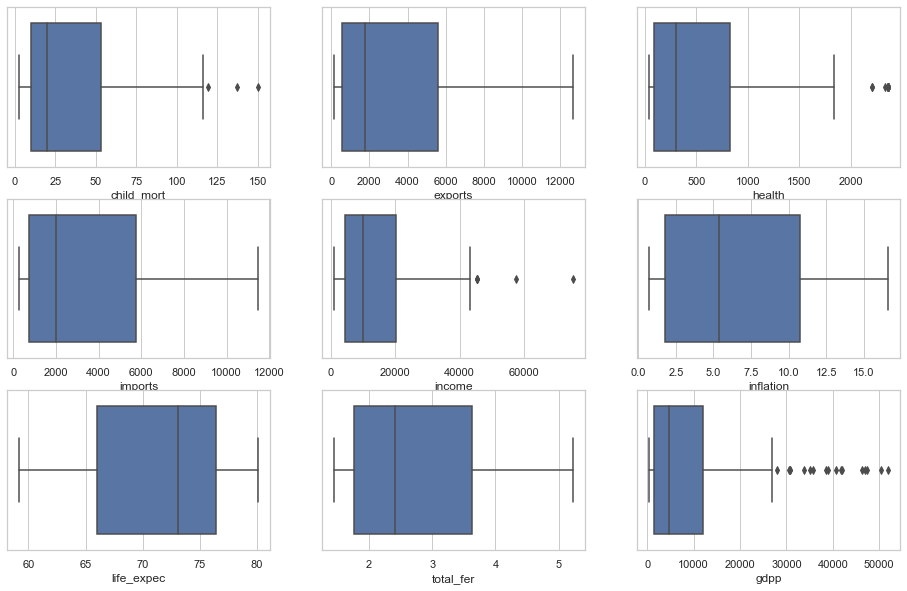

In [16]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = data_params.columns.tolist()[1:]

for i in enumerate(columns):
    plt.subplot(3, 3, i[0] + 1)
    sns.boxplot(x = i[1], data = data_params)

In [17]:
data_params.shape

(139, 10)

#### Prepare the data for scaling

In [18]:
ID = data_params['id']
data1 = data_params.drop('id', axis = 1)
data1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.200,157.219,43.744,279.874,1610,9.440,59.180,5.222,553
1,16.600,1145.200,267.895,1987.740,9930,4.490,76.300,1.650,4090
2,27.300,1712.640,185.982,1400.440,12900,16.100,76.500,2.890,4460
3,119.000,2199.190,100.605,1514.370,5900,16.600,60.100,5.222,3530
4,10.300,5551.000,735.660,7185.800,19100,1.440,76.800,2.130,12200
...,...,...,...,...,...,...,...,...,...
161,36.300,437.460,80.178,393.300,4240,16.500,68.800,2.340,1380
162,29.200,1384.020,155.925,1565.190,2950,2.620,63.000,3.500,2970
164,23.300,943.200,89.604,1050.620,4490,12.100,73.100,1.950,1310
165,56.300,393.000,67.858,450.640,4480,16.600,67.500,4.670,1310


#### Scale the data for PCA

In [19]:
scaler = StandardScaler()
data2 = scaler.fit_transform(data1)

In [20]:
data2

array([[ 1.62934795, -0.84712764, -0.77739524, ..., -1.7661707 ,
         1.86635505, -0.7597062 ],
       [-0.5367077 , -0.61445202, -0.47372599, ...,  0.75462405,
        -0.91669251, -0.47642611],
       [-0.22180559, -0.48081637, -0.58469786, ...,  0.78407259,
         0.04942703, -0.44679262],
       ...,
       [-0.33952601, -0.66202427, -0.71526622, ...,  0.28344746,
        -0.68295391, -0.69907769],
       [ 0.63166743, -0.79159979, -0.74472668, ..., -0.54111157,
         1.43627603, -0.69907769],
       [ 1.42039421, -0.75693328, -0.72015688, ..., -1.7661707 ,
         1.86635505, -0.68706412]])

#### Check the variance contribution of each column

In [21]:
variance_contr = data1.var() / float(sum(data1.var()))
variance_contr * 100

child_mort    0.000
exports       4.829
health        0.146
imports       3.934
income       49.341
inflation     0.000
life_expec    0.000
total_fer     0.000
gdpp         41.750
dtype: float64

#### Observation: Income and GDPP contribute majority of the variance in the dataset.

#### Principal Component Analysis

In [22]:
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[-0.30755534,  0.36419299,  0.36696625,  0.37875519,  0.36193336,
        -0.16583441,  0.33670582, -0.29573777,  0.36786548],
       [ 0.49961351,  0.29860303,  0.19445676,  0.22924043,  0.2371675 ,
         0.16726681, -0.35897599,  0.525696  ,  0.28532667],
       [-0.170333  ,  0.05931874, -0.13393535, -0.05951535,  0.23321156,
         0.93042867,  0.11216541, -0.11486514, -0.01126895],
       [-0.07671075,  0.42659855, -0.52779652,  0.29774906,  0.21263158,
        -0.13580732, -0.43470904, -0.26323608, -0.35069142],
       [ 0.00902262, -0.16296635,  0.40425845, -0.0573164 , -0.17615577,
         0.12302412, -0.64555158, -0.55051474,  0.20169624],
       [ 0.47784835, -0.24459757, -0.26121122, -0.32969825,  0.57447025,
        -0.15179197,  0.1102807 , -0.33809725,  0.23531318],
       [-0.62523523, -0.23878067, -0.12869757, -0.22954714,  0.35999241,
        -0.13178996, -0.35394891,  0.36305801,  0.2806344 ],
       [-0.00168155, -0.16978979,  0.50933735, -0.02725024,  0

In [24]:
pca.explained_variance_ratio_

array([0.68261815, 0.1445065 , 0.10055687, 0.02554332, 0.01778602,
       0.01280149, 0.01145077, 0.00306131, 0.00167557])

#### Plot the explained variance against the number of components

Text(0, 0.5, 'Cumulative Variance')

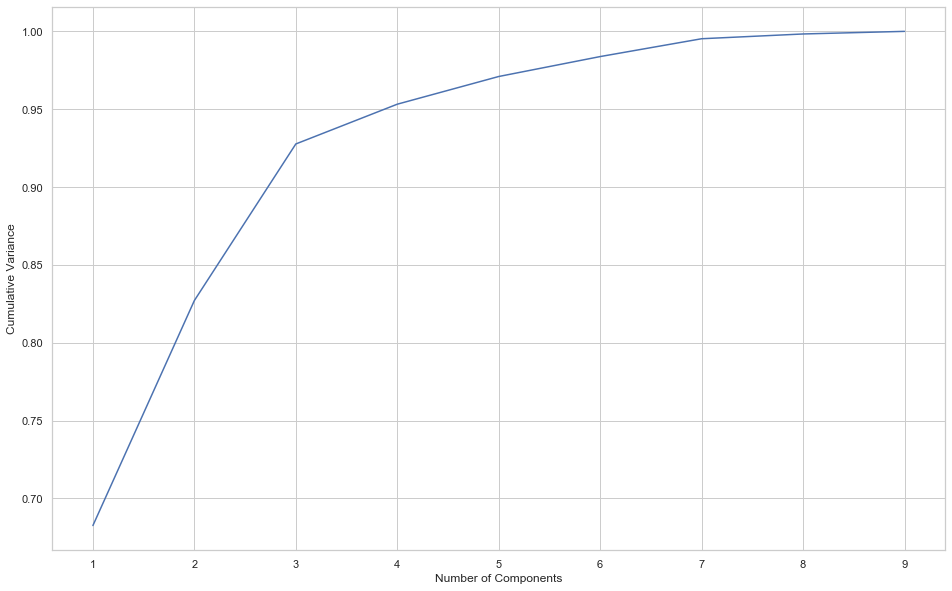

In [25]:
%matplotlib inline
fig = plt.figure(figsize = (16, 10))
plt.plot([1,2,3,4,5,6,7,8,9], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### Observation: 3 components together explain more than 90% of variance

#### Perform Incremental PCA to get the final PCA vectors

In [26]:
pca_final = IncrementalPCA(n_components = 3)
df_pca = pca_final.fit_transform(data2)
df_pca.shape

(139, 3)

In [27]:
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2': pc[1], 'PC3': pc[2]})
pca_df2.head()

,PC1,PC2,PC3
0,-3.289,1.455,-0.346
1,-0.111,-1.688,-0.128
2,-0.793,-0.640,1.754
3,-3.192,2.423,0.803
4,1.560,-0.611,-0.600


In [28]:
pca_df2 = pd.DataFrame({'id': list(ID), 'PC1': pc[0], 'PC2': pc[1], 'PC3': pc[2]})
pca_df2.head()

,id,PC1,PC2,PC3
0,1,-3.289,1.455,-0.346
1,2,-0.111,-1.688,-0.128
2,3,-0.793,-0.640,1.754
3,4,-3.192,2.423,0.803
4,5,1.560,-0.611,-0.600


#### Hopkins statistic: Determine cluster tendency of the dataset.

In [29]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(pca_df2.drop('id', axis=1))

0.6879051958350129

In [31]:
data3 = pca_df2.drop('id', axis = 1)

In [32]:
data3.head()

,PC1,PC2,PC3
0,-3.289,1.455,-0.346
1,-0.111,-1.688,-0.128
2,-0.793,-0.640,1.754
3,-3.192,2.423,0.803
4,1.560,-0.611,-0.600


#### KMeans Clustering

#### Determine the optimal number of clusters.

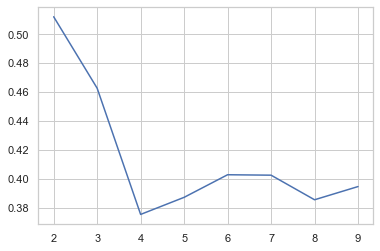

In [33]:
# Silhoutte score method
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data3)
    ss.append([k, silhouette_score(data3, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

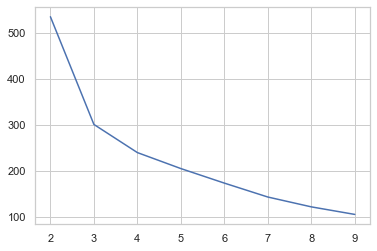

In [34]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data3)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

#### From the above metrics, taking number of clusters = 3

In [35]:
model_kmean = KMeans(n_clusters = 3, random_state = 50)
model_kmean.fit(data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [36]:
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['id', 'PC1', 'PC2', 'PC3', 'ClusterID']
dat_km.head()

,id,PC1,PC2,PC3,ClusterID
0,1,-3.289,1.455,-0.346,2
1,2,-0.111,-1.688,-0.128,0
2,3,-0.793,-0.640,1.754,0
3,4,-3.192,2.423,0.803,2
4,5,1.560,-0.611,-0.600,0


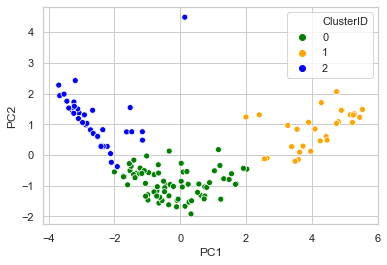

In [37]:
sns.scatterplot(x='PC1', y='PC2', hue="ClusterID", palette=['green', 'orange', 'blue'], data=dat_km)

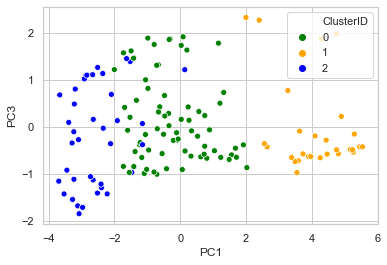

In [38]:
sns.scatterplot(x='PC1', y='PC3', hue="ClusterID", palette=['green', 'orange', 'blue'], data=dat_km)

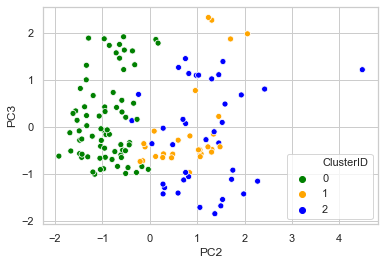

In [39]:
sns.scatterplot(x='PC2', y='PC3', hue="ClusterID", palette=['green', 'orange', 'blue'], data=dat_km)

In [40]:
dat_km[['id', 'ClusterID']]

,id,ClusterID
0,1,2
1,2,0
2,3,0
3,4,2
4,5,0
...,...,...
134,162,0
135,163,0
136,165,0
137,166,2


#### Hierarchial Clustering

#### 1) Single Linkage

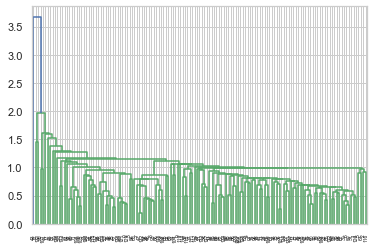

In [41]:
mergings = linkage(data2, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
x = cut_tree(mergings, n_clusters=3).reshape(-1,)
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0])

#### 2) Complete Linkage

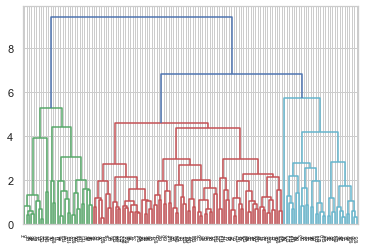

In [43]:
mergings = linkage(data2, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
y = cut_tree(mergings, n_clusters=3).reshape(-1,)
y

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 0, 0])

In [45]:
data_params = pd.merge(data_params, dat_km[['id', 'ClusterID']], on='id', how='inner')

#### Prepare the final dataset with clustering results

In [46]:
data_params['Cluster_labels_1'] = x
data_params['Cluster_labels_2'] = y

In [47]:
data_params

,id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_labels_1,Cluster_labels_2
0,1,90.200,157.219,43.744,279.874,1610,9.440,59.180,5.222,553,2,0,0
1,2,16.600,1145.200,267.895,1987.740,9930,4.490,76.300,1.650,4090,0,0,1
2,3,27.300,1712.640,185.982,1400.440,12900,16.100,76.500,2.890,4460,0,0,1
3,4,119.000,2199.190,100.605,1514.370,5900,16.600,60.100,5.222,3530,2,0,0
4,5,10.300,5551.000,735.660,7185.800,19100,1.440,76.800,2.130,12200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,162,36.300,437.460,80.178,393.300,4240,16.500,68.800,2.340,1380,0,0,1
135,163,29.200,1384.020,155.925,1565.190,2950,2.620,63.000,3.500,2970,0,0,1
136,165,23.300,943.200,89.604,1050.620,4490,12.100,73.100,1.950,1310,0,0,1
137,166,56.300,393.000,67.858,450.640,4480,16.600,67.500,4.670,1310,2,0,0


In [48]:
data_params = pd.merge(data[['id', 'country']], data_params, on='id', how='inner') 

In [49]:
data_params

,id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_labels_1,Cluster_labels_2
0,1,Afghanistan,90.200,157.219,43.744,279.874,1610,9.440,59.180,5.222,553,2,0,0
1,2,Albania,16.600,1145.200,267.895,1987.740,9930,4.490,76.300,1.650,4090,0,0,1
2,3,Algeria,27.300,1712.640,185.982,1400.440,12900,16.100,76.500,2.890,4460,0,0,1
3,4,Angola,119.000,2199.190,100.605,1514.370,5900,16.600,60.100,5.222,3530,2,0,0
4,5,Antigua and Barbuda,10.300,5551.000,735.660,7185.800,19100,1.440,76.800,2.130,12200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,162,Uzbekistan,36.300,437.460,80.178,393.300,4240,16.500,68.800,2.340,1380,0,0,1
135,163,Vanuatu,29.200,1384.020,155.925,1565.190,2950,2.620,63.000,3.500,2970,0,0,1
136,165,Vietnam,23.300,943.200,89.604,1050.620,4490,12.100,73.100,1.950,1310,0,0,1
137,166,Yemen,56.300,393.000,67.858,450.640,4480,16.600,67.500,4.670,1310,2,0,0


#### Select GDP per capita, child mortality rate and net income as decision parameters

In [50]:
data_params = data_params[['country', 'gdpp', 'child_mort', 'income', 'ClusterID', 'Cluster_labels_1', 'Cluster_labels_2']]

In [51]:
data_params

,country,gdpp,child_mort,income,ClusterID,Cluster_labels_1,Cluster_labels_2
0,Afghanistan,553,90.200,1610,2,0,0
1,Albania,4090,16.600,9930,0,0,1
2,Algeria,4460,27.300,12900,0,0,1
3,Angola,3530,119.000,5900,2,0,0
4,Antigua and Barbuda,12200,10.300,19100,0,0,1
...,...,...,...,...,...,...,...
134,Uzbekistan,1380,36.300,4240,0,0,1
135,Vanuatu,2970,29.200,2950,0,0,1
136,Vietnam,1310,23.300,4490,0,0,1
137,Yemen,1310,56.300,4480,2,0,0


#### Cluster Profiling

#### In the above data set, we have obtained the clusters to which each country belongs.
##### ClusterID: KMeans algorithm
##### Cluster_labels_1: Hierarchial (Single linkage)
##### Cluster_labels_2: Hierarchial (Complete linkage)

In [52]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

<Figure size 1440x1440 with 0 Axes>

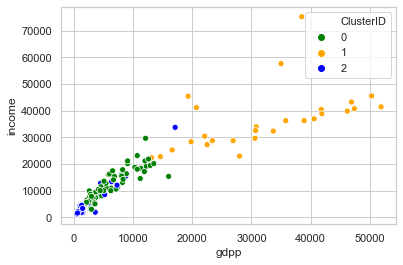

In [53]:
sns.scatterplot(x='gdpp', y='income', hue='ClusterID', palette=['green', 'orange', 'blue'], data=data_params)

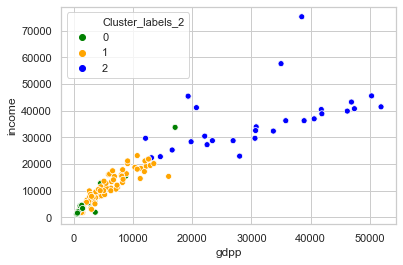

In [54]:
sns.scatterplot(x='gdpp', y='income', hue='Cluster_labels_2', palette=['green', 'orange', 'blue'], data=data_params)

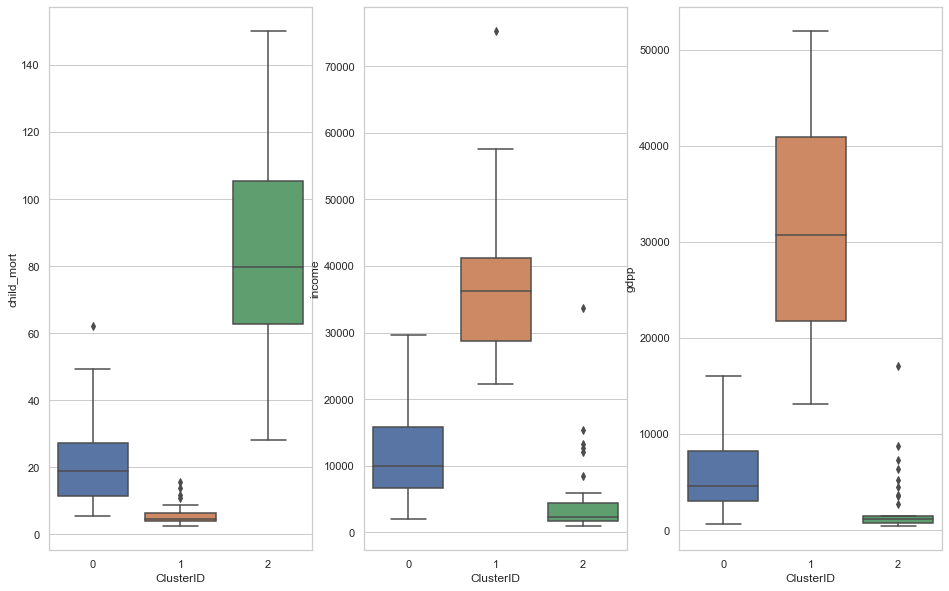

In [55]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ['child_mort', 'income', 'gdpp']

for i in enumerate(columns):
    plt.subplot(1, 3, i[0] + 1)
    sns.boxplot(x = 'ClusterID', y = i[1], data = data_params)

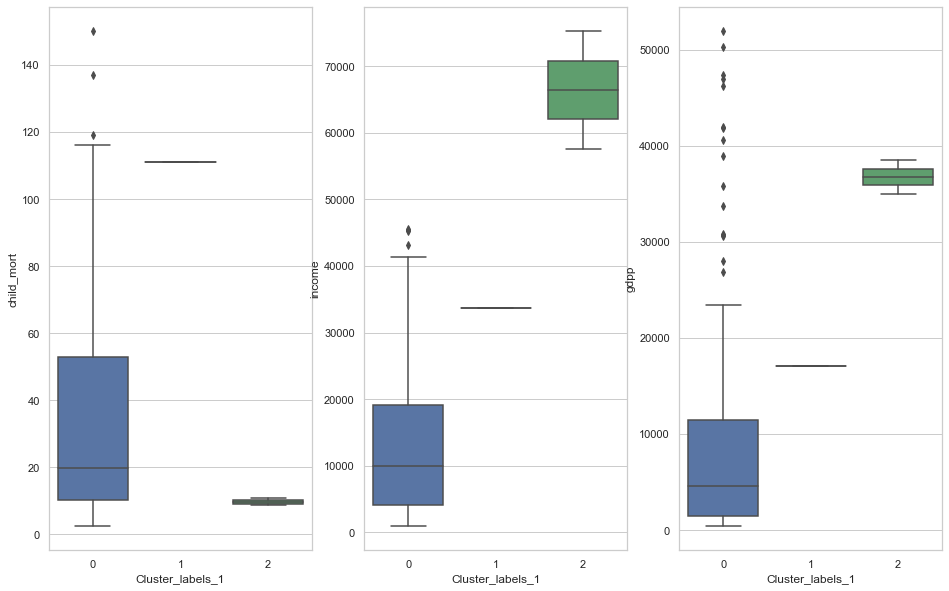

In [56]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ['child_mort', 'income', 'gdpp']

for i in enumerate(columns):
    plt.subplot(1, 3, i[0] + 1)
    sns.boxplot(x = 'Cluster_labels_1', y = i[1], data = data_params)

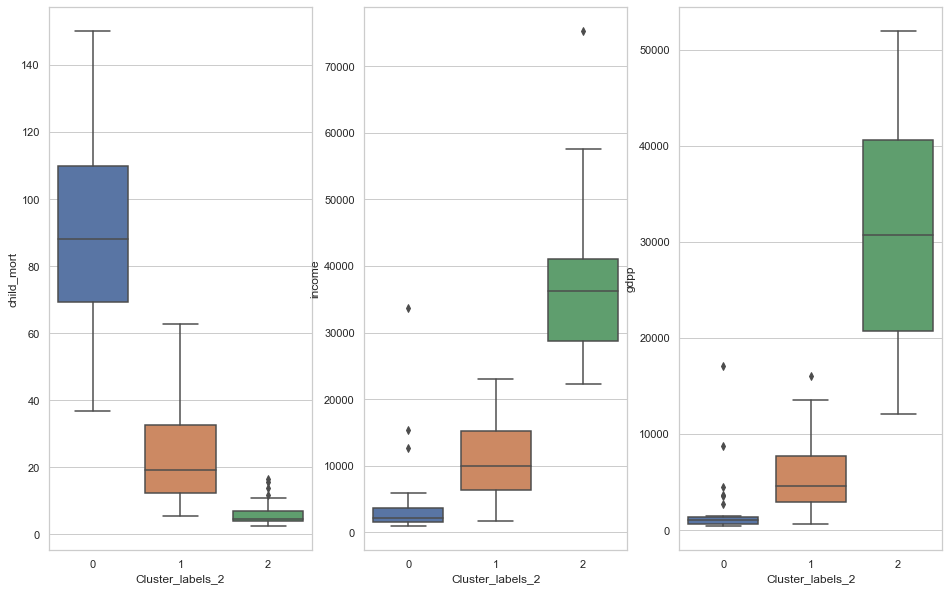

In [57]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ['child_mort', 'income', 'gdpp']

for i in enumerate(columns):
    plt.subplot(1, 3, i[0] + 1)
    sns.boxplot(x = 'Cluster_labels_2', y = i[1], data = data_params)

#### Observation: Out of the three clustering methods, we can observe that single linkage is the least useful. Complete linkage and KMeans algorithm give better results.

#### Finding the list of countries

In [58]:
#data_params[data_params['Cluster_labels_2'] == 0]
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = data_params[data_params['Cluster_labels_2'] == 0].style.background_gradient(cmap=cm)
styled_table

,country,gdpp,child_mort,income,ClusterID,Cluster_labels_1,Cluster_labels_2
0,Afghanistan,553,90.2,1610,2,0,0
3,Angola,3530,119,5900,2,0,0
16,Benin,758,111,1820,2,0,0
23,Burkina Faso,575,116,1430,2,0,0
25,Cameroon,1310,108,2660,2,0,0
28,Chad,897,150,1930,2,0,0
32,Comoros,769,88.2,1410,2,0,0
33,"Congo, Rep.",2740,63.9,5190,2,0,0
35,Cote d'Ivoire,1220,111,2690,2,0,0
43,Equatorial Guinea,17100,111,33700,2,1,0


In [59]:
data_params[data_params['Cluster_labels_2'] == 1]
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = data_params[data_params['Cluster_labels_2'] == 1].style.background_gradient(cmap=cm)
styled_table

,country,gdpp,child_mort,income,ClusterID,Cluster_labels_1,Cluster_labels_2
1,Albania,4090,16.6,9930,0,0,1
2,Algeria,4460,27.3,12900,0,0,1
4,Antigua and Barbuda,12200,10.3,19100,0,0,1
5,Argentina,10300,14.5,18700,0,0,1
6,Armenia,3220,18.1,6700,0,0,1
9,Azerbaijan,5840,39.2,16000,0,0,1
12,Bangladesh,758,49.4,2440,0,0,1
13,Barbados,16000,14.2,15300,0,0,1
14,Belarus,6030,5.5,16200,0,0,1
15,Belize,4340,18.8,7880,0,0,1


In [60]:
data_params[data_params['Cluster_labels_2'] == 2]
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = data_params[data_params['Cluster_labels_2'] == 2].style.background_gradient(cmap=cm)
styled_table

,country,gdpp,child_mort,income,ClusterID,Cluster_labels_1,Cluster_labels_2
7,Australia,51900,4.8,41400,1,0,2
8,Austria,46900,4.3,43200,1,0,2
10,Bahamas,28000,13.8,22900,1,0,2
11,Bahrain,20700,8.6,41100,1,0,2
26,Canada,47400,5.6,40700,1,0,2
37,Cyprus,30800,3.6,33900,1,0,2
38,Czech Republic,19800,3.4,28300,1,0,2
44,Estonia,14600,4.5,22700,1,0,2
46,Finland,46200,3,39800,1,0,2
47,France,40600,4.2,36900,1,0,2


In [61]:
data_params[data_params['ClusterID'] == 0]

,country,gdpp,child_mort,income,ClusterID,Cluster_labels_1,Cluster_labels_2
1,Albania,4090,16.600,9930,0,0,1
2,Algeria,4460,27.300,12900,0,0,1
4,Antigua and Barbuda,12200,10.300,19100,0,0,1
5,Argentina,10300,14.500,18700,0,0,1
6,Armenia,3220,18.100,6700,0,0,1
...,...,...,...,...,...,...,...
130,Ukraine,2970,11.700,7820,0,0,1
133,Uruguay,11900,10.600,17100,0,0,1
134,Uzbekistan,1380,36.300,4240,0,0,1
135,Vanuatu,2970,29.200,2950,0,0,1


In [62]:
print(len(data_params[data_params['Cluster_labels_2'] == 0]))
print(len(data_params[data_params['Cluster_labels_2'] == 1]))
print(len(data_params[data_params['Cluster_labels_2'] == 2]))

31
79
29


In [63]:
print(len(data_params[data_params['ClusterID'] == 2]))
print(len(data_params[data_params['ClusterID'] == 0]))
print(len(data_params[data_params['ClusterID'] == 1]))

38
73
28


#### Observation: From the above two results it is clear that barring a few casualities, both K Means and Hierarchical clustering with complete linkage give identical results and hence any one can be taken for interpretation. 

#### Cluster Analysis

#### K Means Algorithm

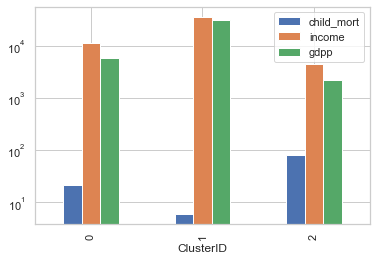

In [64]:
data_params[['child_mort', 'income', 'gdpp', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar', logy = True)

#### Hierarchical Clustering Algorithm

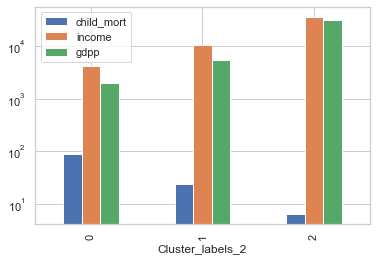

In [65]:
data_params[['child_mort', 'income', 'gdpp', 'Cluster_labels_2']].groupby('Cluster_labels_2').mean().plot(kind = 'bar', logy = True)